<a href="https://colab.research.google.com/github/aviral-shrivastava/Sentimental-analysis/blob/main/twitter_vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


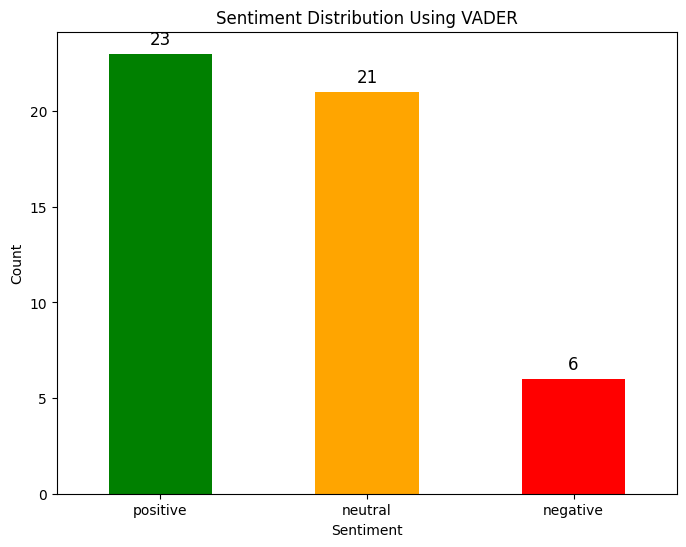

Sentiment Counts Using VADER:
Predicted_Sentiment
positive    23
neutral     21
negative     6
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download

# Download VADER resources
download("vader_lexicon")

# Load the test dataset
test_data = pd.read_csv("test.csv")  # Replace with your actual test.csv file path

# Initialize VADER Sentiment Analyzer
vader = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment_vader(text):
    scores = vader.polarity_scores(text)
    if scores["compound"] >= 0.05:
        return "positive"
    elif scores["compound"] <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis
test_data["Predicted_Sentiment"] = test_data["tweet_text"].apply(analyze_sentiment_vader)

# Count the sentiments
sentiment_counts = test_data["Predicted_Sentiment"].value_counts()

# Plot histogram with sentiment counts
plt.figure(figsize=(8, 6))
bar_plot = sentiment_counts.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Sentiment Distribution Using VADER")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Add text labels on the bars
for idx, value in enumerate(sentiment_counts):
    plt.text(idx, value + 0.5, str(value), ha="center", fontsize=12)

plt.show()

# Print sentiment counts
print("Sentiment Counts Using VADER:")
print(sentiment_counts)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Ensure the ground truth sentiment labels exist in the dataset
if "sentiment" in test_data.columns:
    # Map true labels to match the VADER output format
    true_labels = test_data["sentiment"]  # Assuming values like "positive", "neutral", "negative"

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, test_data["Predicted_Sentiment"])
    print(f"Model Accuracy (VADER): {accuracy:.2f}")

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, test_data["Predicted_Sentiment"]))
else:
    print("Ground truth sentiment labels are not available in the dataset.")


Model Accuracy (VADER): 0.48

Classification Report:
              precision    recall  f1-score   support

    negative       0.17      0.33      0.22         3
     neutral       0.29      0.46      0.35        13
    positive       0.74      0.50      0.60        34

    accuracy                           0.48        50
   macro avg       0.40      0.43      0.39        50
weighted avg       0.59      0.48      0.51        50

